# 모듈 Importing

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [ ]:
pd.set_option('display.max_columns', None)
df_male = pd.read_csv('dataset/male_volleyball.csv')
df_female = pd.read_csv('dataset/female_volleyball.csv')

# 데이터 전처리 남자
- 퀵오픈 성공률, 퀵오픈 총 성공횟수
- 오픈 성공률, 오픈 총 성공횟수
- 블로킹 성공률, 블로킹 총 성공횟수
- 디그 성공률, 디그 총 성공횟수
- 연도별 공격 스타일 경향

In [2]:
# 연도별 공격컬럼 생성
def year_attack(df):
    df['연도별오픈'] = 0
    df['연도별퀵오픈'] = 0
    df['연도별속공'] = 0
    df['연도별시간차'] = 0
    df['연도별이동'] = 0
    df['연도별후위'] = 0
    array = df['연도'].unique()
    for i in range(len(array)):
        연도별오픈 = df[df['연도']==array[i]]['오픈_시도'].sum()
        연도별퀵오픈 = df[df['연도']==array[i]]['퀵오픈_시도'].sum()
        연도별속공 = df[df['연도']==array[i]]['속공_시도'].sum()
        연도별시간차 = df[df['연도']==array[i]]['시간차_시도'].sum()
        연도별이동 = df[df['연도']==array[i]]['이동_시도'].sum()
        연도별후위 = df[df['연도']==array[i]]['후위_시도'].sum()
        
        df.loc[df['연도']==array[i],'연도별오픈'] = 연도별오픈
        df.loc[df['연도']==array[i],'연도별퀵오픈'] = 연도별퀵오픈
        df.loc[df['연도']==array[i],'연도별속공'] = 연도별속공
        df.loc[df['연도']==array[i],'연도별시간차'] = 연도별시간차
        df.loc[df['연도']==array[i],'연도별이동'] = 연도별이동
        df.loc[df['연도']==array[i],'연도별후위'] = 연도별후위
    return df

# 승률 변환 함수
def team_transform(df):
    df['승률'] = 0
    array = df['팀명'].unique()
        
    for i in range(len(array)):
        승리수 = df[df['팀명']==array[i]]['결과'].sum()
        게임수 = df[df['팀명']==array[i]]['결과'].count()
                     
        승률=(round(승리수/게임수*100))
        df.loc[df['팀명']==array[i],'승률'] = 승률
    return df

# 성공률 변환 함수
def transform_rate(df):
    df = df.copy()
    df['오픈성공률'] = 0
    df['퀵오픈성공률'] = 0 
    df['디그성공률'] = 0
    df['블로킹성공률'] = 0 
    array = df['팀명'].unique()
    for i in range(len(array)):
        # 오픈성공률
        오픈성공 = df[df['팀명']==array[i]]['오픈_성공'].sum()
        오픈시도 = df[df['팀명']==array[i]]['오픈_시도'].sum()
        
        오픈성공률=(round(오픈성공/오픈시도*100,2))
        df.loc[df['팀명']==array[i],'오픈성공률'] = 오픈성공률
        
        # 퀵오픈성공률
        퀵오픈성공 = df[df['팀명']==array[i]]['퀵오픈_성공'].sum()
        퀵오픈시도 = df[df['팀명']==array[i]]['퀵오픈_시도'].sum()
                     
        퀵오픈성공률=(round(퀵오픈성공/퀵오픈시도*100,2))
        df.loc[df['팀명']==array[i],'퀵오픈성공률'] = 퀵오픈성공률
        
        # 디그성공률
        디그성공 = df[df['팀명']==array[i]]['디그_성공'].sum()
        디그시도 = df[df['팀명']==array[i]]['디그_시도'].sum()
                     
        디그성공률=(round(디그성공/디그시도*100,2))
        df.loc[df['팀명']==array[i],'디그성공률'] = 디그성공률
        
         # 블로킹성공률
        블로킹성공 = df[df['팀명']==array[i]]['블로킹_성공'].sum()
        블로킹시도 = df[df['팀명']==array[i]]['블로킹_시도'].sum()
                     
        블로킹성공률=(round(블로킹성공/블로킹시도*100,2))
        df.loc[df['팀명']==array[i],'블로킹성공률'] = 블로킹성공률
    return df

# 총 성공 횟수 
def transform_count(df):
    df['총오픈성공'] = 0
    df['총퀵오픈성공'] = 0 
    df['총디그성공'] = 0
    df['총블로킹성공'] = 0 
    df['총세트성공'] = 0
    df['총서브성공'] = 0
    
    array = df['팀명'].unique()
    for i in range(len(array)):
        
        # 총오픈성공횟수
        총오픈성공 = df[df['팀명']==array[i]]['오픈_성공'].sum()
        
        df.loc[df['팀명']==array[i],'총오픈성공'] = 총오픈성공
        
        # 총퀵오픈성공횟수
        총퀵오픈성공 = df[df['팀명']==array[i]]['퀵오픈_성공'].sum()
                     
        df.loc[df['팀명']==array[i],'총퀵오픈성공'] = 총퀵오픈성공
        
        # 총디그성공횟수
        총디그성공 = df[df['팀명']==array[i]]['디그_성공'].sum()
             
        df.loc[df['팀명']==array[i],'총디그성공'] = 총디그성공
        
         # 총블로킹성공
        총블로킹성공 = df[df['팀명']==array[i]]['블로킹_성공'].sum()
                   
        df.loc[df['팀명']==array[i],'총블로킹성공'] = 총블로킹성공
        
        # 총세트성공
        총세트성공 = df[df['팀명']==array[i]]['세트_성공'].sum()
                   
        df.loc[df['팀명']==array[i],'총세트성공'] = 총세트성공
        
        # 총서브성공
        총서브성공 = df[df['팀명']==array[i]]['서브_성공'].sum()
                   
        df.loc[df['팀명']==array[i],'총서브성공'] = 총서브성공
    return df

# 각 팀별로 나누는 함수
def reduce_team(df):
    array = df['팀명'].unique()
    index = [0]*len(array)
    for i in range(len(array)):
        index[i] = df[df['팀명']==array[i]].iloc[0].name
    return index

# 각 년도별로 나누는 함수
def reduce_year(df):
    array = df['연도'].unique()
    index = [0]*len(array)
    for i in range(len(array)):
        index[i] = df[df['연도']==array[i]].iloc[0].name
    return index

In [3]:
# 변경된 팀명 적용
df_male['팀명'] = df_male['팀명'].replace({'OK저축은행':'OK금융그룹'})

# 데이터 타입변경
df_male['경기날짜'] = pd.to_datetime(df_male['경기날짜'])

# 필요한 feature만 남긴 DF 생성
df_male_mod = df_male[['팀명', '경기날짜', '결과', '득점_득점',
    '공격종합_시도', '공격종합_성공',
    '오픈_시도', '오픈_성공',
    '시간차_시도', '시간차_성공',
    '이동_시도', '이동_성공',
    '후위_시도', '후위_성공',
    '속공_시도', '속공_성공',
    '퀵오픈_시도', '퀵오픈_성공',
    '서브_시도', '서브_성공',
    '디그_시도', '디그_성공',
    '세트_시도', '세트_성공',
    '리시브_시도', '리시브_정확',
    '블로킹_시도', '블로킹_성공',
    '범실_범실','스타팅멤버']
]
남자_팀별경기기록 = df_male_mod.groupby(['팀명', '경기날짜']).sum()
# 결과 승패 1, 0으로 바꾸기
남자_팀별경기기록['결과'] = 남자_팀별경기기록['결과'].apply(lambda x: 1 if x != 0 else 0)

In [4]:
# 남자 연도별 공격기록
남자_연도별공격기록 = 남자_팀별경기기록.reset_index()
남자_연도별공격기록['연도'] = 남자_연도별공격기록['경기날짜'].apply(lambda x : 2017 if x.year == 2017 else 2018 if x.year == 2018 else 2019 if x.year==2019 else 2020 if x.year == 2020 else 2021 if x.year == 2021 else 2022)
남자_연도별공격기록 = year_attack(남자_연도별공격기록)
남자_연도별공격기록 = 남자_연도별공격기록[['연도','연도별오픈','연도별퀵오픈','연도별속공','연도별시간차','연도별이동','연도별후위']]

In [5]:
# 남자 팀별 공격기록
남자_팀별경기기록.index = 남자_팀별경기기록.index.droplevel(1)
남자_팀별경기기록 = 남자_팀별경기기록.reset_index()
남자_팀별경기기록 = team_transform(남자_팀별경기기록)
남자_팀별경기기록 = 남자_팀별경기기록[['팀명','오픈_시도','오픈_성공','퀵오픈_시도','퀵오픈_성공','블로킹_시도','블로킹_성공','디그_시도','디그_성공','세트_시도','세트_성공','서브_시도','서브_성공','승률']]

In [6]:
# 성공률 변환
남자_팀별경기기록_성공률=transform_rate(남자_팀별경기기록)
# 총 성공 횟수 변환
남자_팀별경기기록_총성공횟수=transform_count(남자_팀별경기기록)

array1 = reduce_team(남자_팀별경기기록_성공률)
array1

array2 = reduce_year(남자_연도별공격기록)
array2

남자_연도별공격기록 = 남자_연도별공격기록.iloc[array2]
남자_연도별공격기록.set_index('연도',inplace=True)

남자_팀별경기기록_성공률 = 남자_팀별경기기록_성공률.iloc[array1][['팀명','오픈성공률','퀵오픈성공률','디그성공률','블로킹성공률','승률']].reset_index()
남자_팀별경기기록_총성공횟수 = 남자_팀별경기기록_총성공횟수.iloc[array1][['팀명','총오픈성공','총퀵오픈성공','총디그성공','총블로킹성공','총세트성공','총서브성공','승률']].reset_index()


# 데이터 전처리 여자
(페퍼저축은행 삭제, 데이터가 5분의 1정도밖에 안되기 때문에 시각화측면에서는 보여주는것이 무의미하다고 판단)
- 퀵오픈 성공률, 퀵오픈 총 성공횟수
- 오픈 성공률, 오픈 총 성공횟수
- 블로킹 성공률, 블로킹 총 성공횟수
- 디그 성공률, 디그 총 성공횟수
- 연도별 공격 스타일 경향

In [7]:
# 신생팀(페퍼저축은행) 제외
df_female = df_female[df_female['팀명']!='페퍼저축은행']

# 데이터 타입 변경
df_female['경기날짜'] = pd.to_datetime(df_female['경기날짜'])

# 필요한 feature만 남긴 DF 생성
df_female_mod = df_female[['팀명', '경기날짜', '결과', '득점_득점',
    '공격종합_시도', '공격종합_성공',
    '오픈_시도', '오픈_성공',
    '시간차_시도', '시간차_성공',
    '이동_시도', '이동_성공',
    '후위_시도', '후위_성공',
    '속공_시도', '속공_성공',
    '퀵오픈_시도', '퀵오픈_성공',
    '서브_시도', '서브_성공',
    '디그_시도', '디그_성공',
    '세트_시도', '세트_성공',
    '리시브_시도', '리시브_정확',
    '블로킹_시도', '블로킹_성공',
    '범실_범실','스타팅멤버']
]
여자_팀별경기기록 = df_female_mod.groupby(['팀명', '경기날짜']).sum()
# 결과 승패 1, 0으로 바꾸기
여자_팀별경기기록['결과'] = 여자_팀별경기기록['결과'].apply(lambda x: 1 if x != 0 else 0)

In [8]:
# 여자 연도별 공격기록
여자_연도별공격기록 = 여자_팀별경기기록.reset_index()
여자_연도별공격기록['연도'] = 여자_연도별공격기록['경기날짜'].apply(lambda x : 2017 if x.year == 2017 else 2018 if x.year == 2018 else 2019 if x.year==2019 else 2020 if x.year == 2020 else 2021 if x.year == 2021 else 2022)
여자_연도별공격기록 = year_attack(여자_연도별공격기록)
여자_연도별공격기록 = 여자_연도별공격기록[['연도','연도별오픈','연도별퀵오픈','연도별속공','연도별시간차','연도별이동','연도별후위']]

In [9]:
# 여자 팀별 공격기록
여자_팀별경기기록.index = 여자_팀별경기기록.index.droplevel(1)
여자_팀별경기기록 = 여자_팀별경기기록.reset_index()
여자_팀별경기기록 = team_transform(여자_팀별경기기록)
여자_팀별경기기록 = 여자_팀별경기기록[['팀명','오픈_시도','오픈_성공','퀵오픈_시도','퀵오픈_성공','블로킹_시도','블로킹_성공','디그_시도','디그_성공','세트_시도','세트_성공','서브_시도','서브_성공','승률']]

In [10]:
# 성공률 변환
여자_팀별경기기록_성공률=transform_rate(여자_팀별경기기록)
# 총 성공 횟수 변환
여자_팀별경기기록_총성공횟수=transform_count(여자_팀별경기기록)

array1 = reduce_team(여자_팀별경기기록_성공률)
array1

array2 = reduce_year(여자_연도별공격기록)
array2

여자_연도별공격기록 = 여자_연도별공격기록.iloc[array2]
여자_연도별공격기록.set_index('연도',inplace=True)

여자_팀별경기기록_성공률 = 여자_팀별경기기록_성공률.iloc[array1][['팀명','오픈성공률','퀵오픈성공률','디그성공률','블로킹성공률','승률']].reset_index()
여자_팀별경기기록_총성공횟수 = 여자_팀별경기기록_총성공횟수.iloc[array1][['팀명','총오픈성공','총퀵오픈성공','총디그성공','총블로킹성공','총세트성공','총서브성공','승률']].reset_index()


# 시각화(남자,여자)

## 시각화 기본 설정

In [11]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (10, 6) 

# 성공률 시각화

## 퀵오픈, 오픈

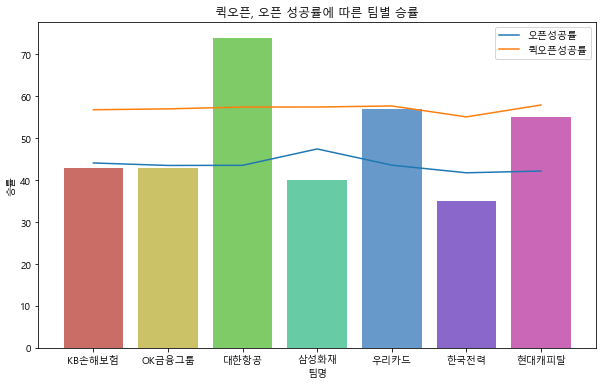

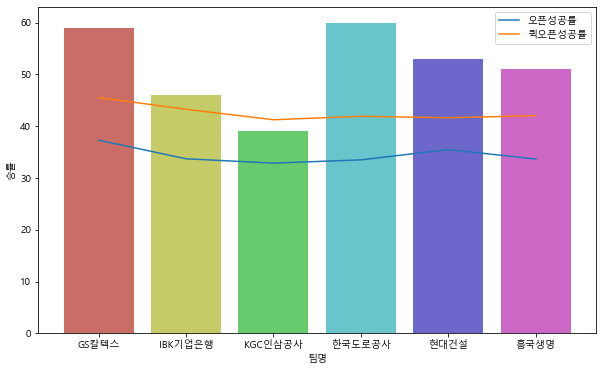

In [12]:
sns.barplot(x=남자_팀별경기기록_성공률['팀명'],y=남자_팀별경기기록_성공률['승률'],palette='hls')
sns.lineplot(x=남자_팀별경기기록_성공률['팀명'],y=남자_팀별경기기록_성공률['오픈성공률'],palette='hls',label='오픈성공률')
sns.lineplot(x=남자_팀별경기기록_성공률['팀명'],y=남자_팀별경기기록_성공률['퀵오픈성공률'],palette='hls',label='퀵오픈성공률')
plt.title("퀵오픈, 오픈 성공률에 따른 팀별 승률")
plt.legend()
plt.show()

sns.barplot(x=여자_팀별경기기록_성공률['팀명'],y=여자_팀별경기기록_성공률['승률'],palette='hls')

sns.lineplot(x=여자_팀별경기기록_성공률['팀명'],y=여자_팀별경기기록_성공률['오픈성공률'],palette='hls',label='오픈성공률')
sns.lineplot(x=여자_팀별경기기록_성공률['팀명'],y=여자_팀별경기기록_성공률['퀵오픈성공률'],palette='hls',label='퀵오픈성공률')
plt.legend()
plt.show()

## 블로킹

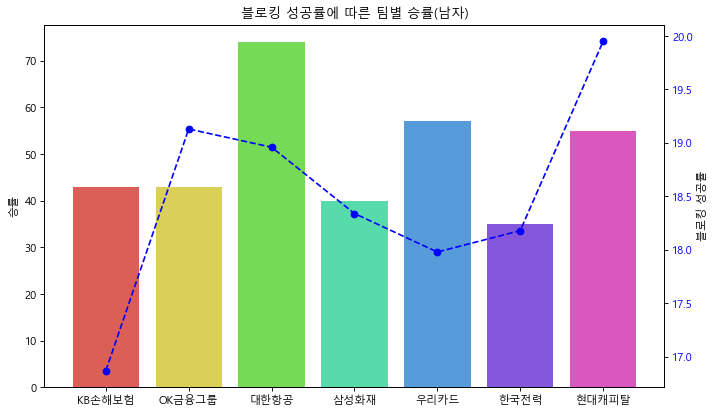

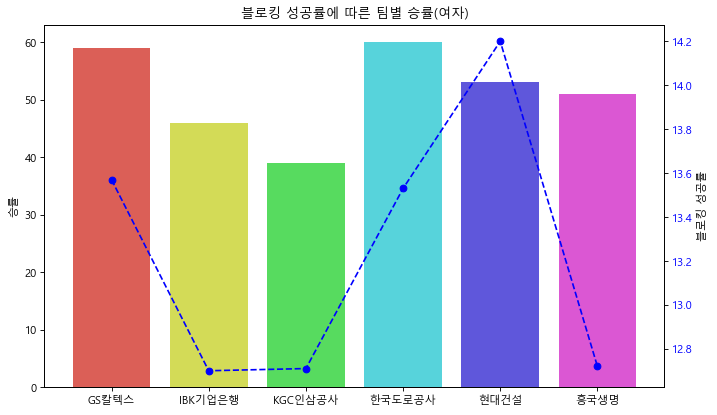

In [13]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_성공률['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_성공률['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_성공률['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_성공률['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_성공률['블로킹성공률'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("블로킹 성공률")

plt.title("블로킹 성공률에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_성공률['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_성공률['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_성공률['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_성공률['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_성공률['블로킹성공률'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("블로킹 성공률")

plt.title("블로킹 성공률에 따른 팀별 승률(여자)")
plt.show()

# 총 성공 횟수 시각화

## 블로킹

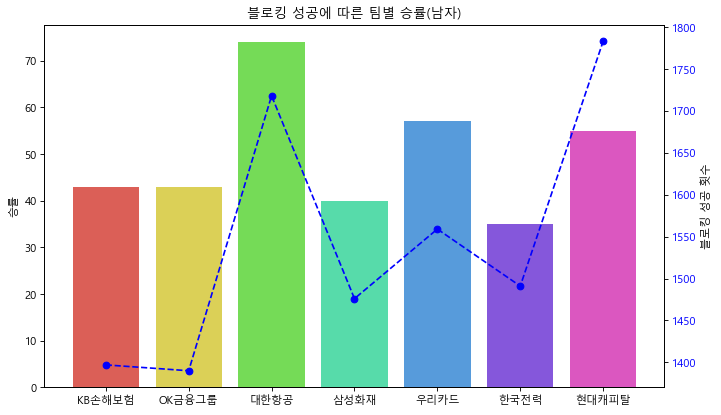

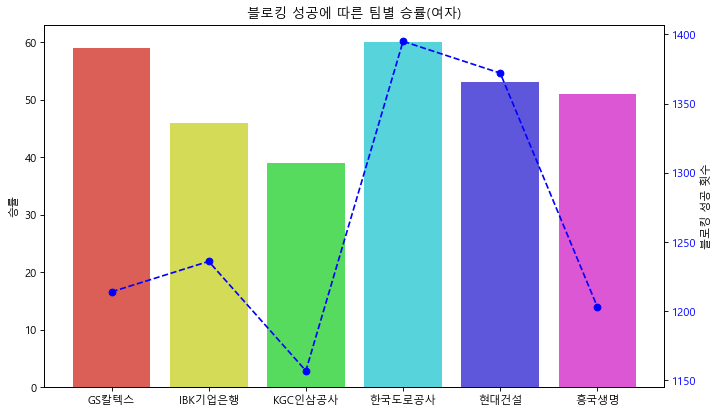

In [14]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총블로킹성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("블로킹 성공 횟수")

plt.title("블로킹 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총블로킹성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("블로킹 성공 횟수")

plt.title("블로킹 성공에 따른 팀별 승률(여자)")
plt.show()

## 디그

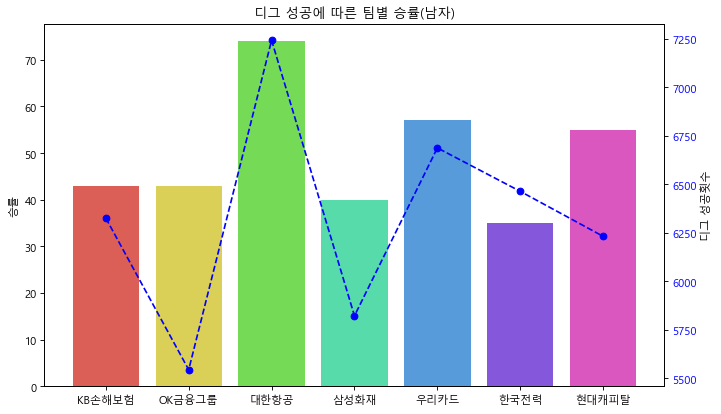

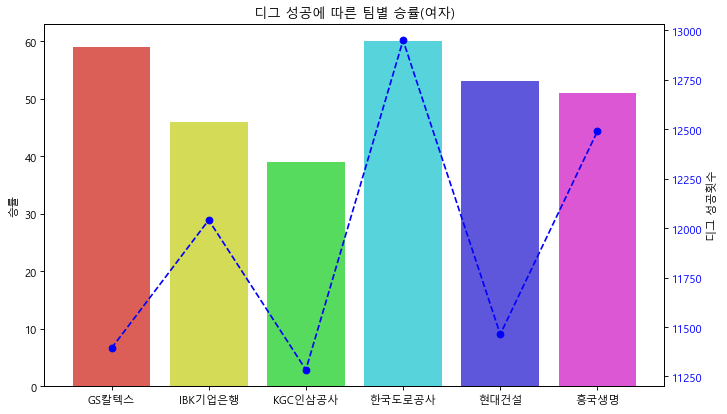

In [15]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총디그성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("디그 성공횟수")
plt.title("디그 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총디그성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("디그 성공횟수")
plt.title("디그 성공에 따른 팀별 승률(여자)")
plt.show()

## 오픈

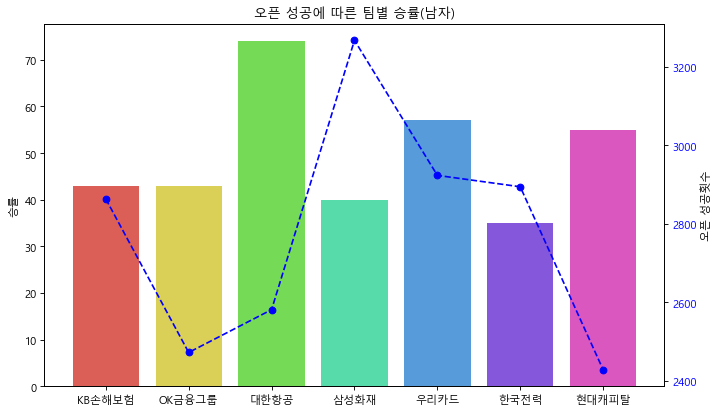

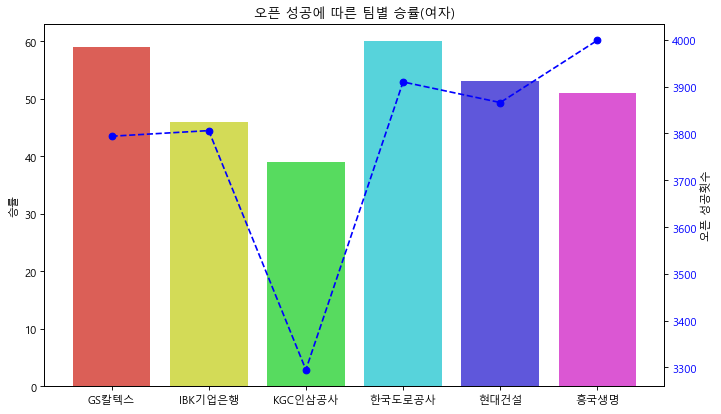

In [16]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총오픈성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("오픈 성공횟수")
plt.title("오픈 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총오픈성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("오픈 성공횟수")
plt.title("오픈 성공에 따른 팀별 승률(여자)")
plt.show()

## 퀵오픈

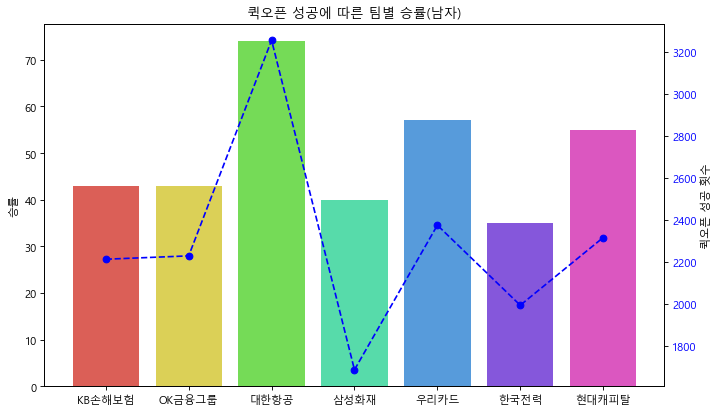

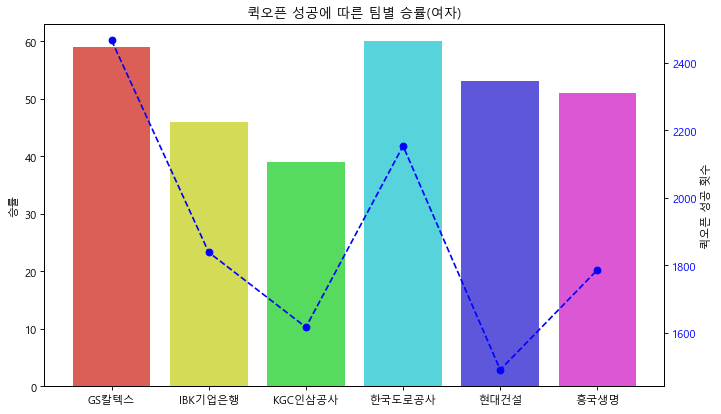

In [17]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총퀵오픈성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("퀵오픈 성공 횟수")

plt.title("퀵오픈 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총퀵오픈성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("퀵오픈 성공 횟수")

plt.title("퀵오픈 성공에 따른 팀별 승률(여자)")
plt.show()

## 세트

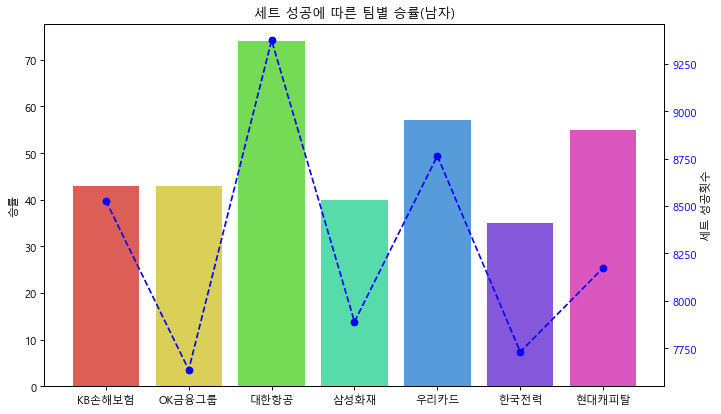

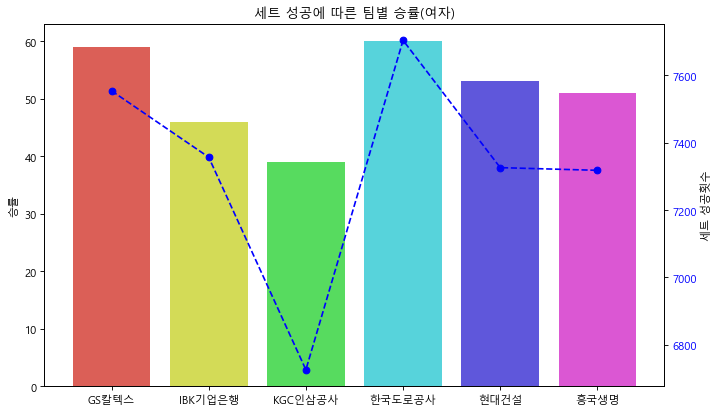

In [18]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총세트성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("세트 성공횟수")
plt.title("세트 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총세트성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("세트 성공횟수")
plt.title("세트 성공에 따른 팀별 승률(여자)")
plt.show()

## 서브

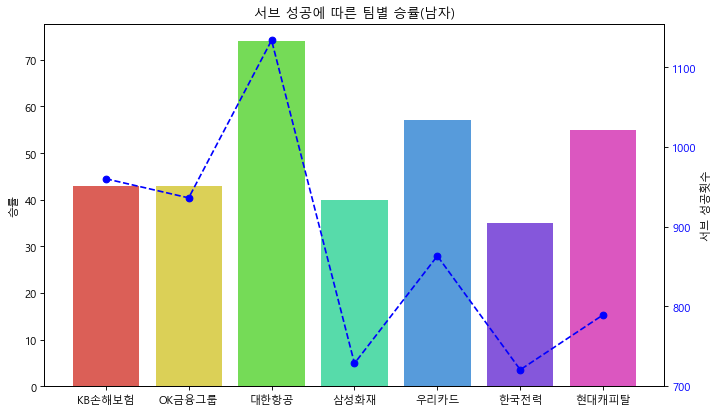

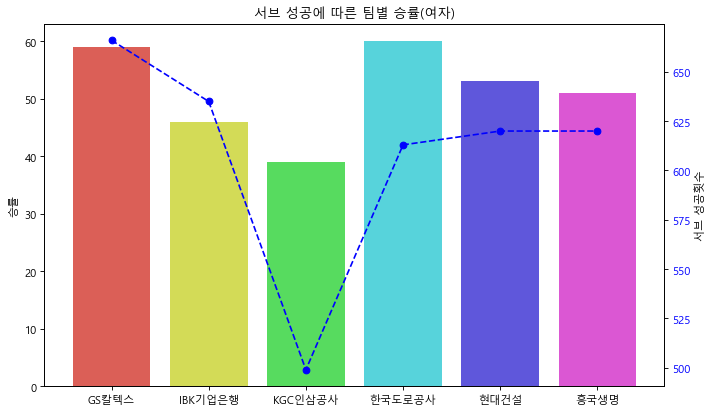

In [19]:
fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(남자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(남자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,남자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,남자_팀별경기기록_총성공횟수['총서브성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("서브 성공횟수")
plt.title("서브 성공에 따른 팀별 승률(남자)")
plt.show()

fig = plt.figure(figsize=(10,6),dpi=80)
colors = sns.color_palette('hls',len(여자_팀별경기기록_총성공횟수['팀명'].unique()))
xtick_label_position = list(range(len(여자_팀별경기기록_총성공횟수['팀명'].unique())))

ax1 = fig.add_subplot()
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique())
ax1.bar(xtick_label_position,여자_팀별경기기록_총성공횟수['승률'],color=colors )
ax1.set_ylabel("승률")

color='blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,여자_팀별경기기록_총성공횟수['총서브성공'],color=color ,linestyle='--',marker='o')
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylabel("서브 성공횟수")
plt.title("서브 성공에 따른 팀별 승률(여자)")
plt.show()

## 오픈, 퀵오픈 성공 횟수에 따른 팀별 승률

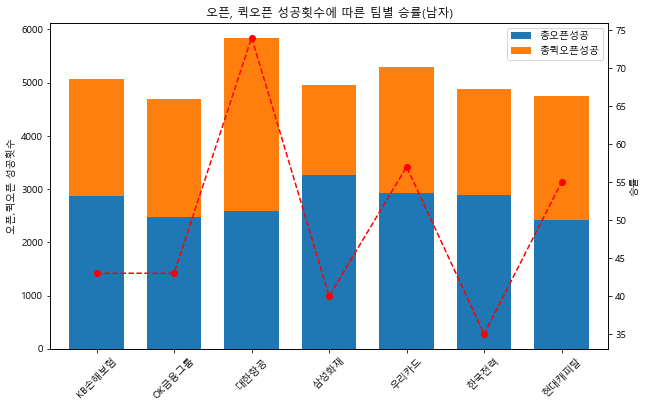

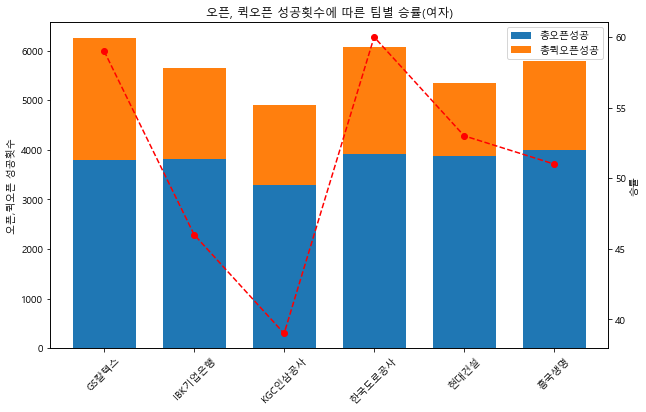

In [20]:
ax1 = 남자_팀별경기기록_총성공횟수[['총오픈성공','총퀵오픈성공']].plot(kind='bar',width=0.7,stacked=True)
ax1.set_ylabel("오픈,퀵오픈 성공횟수")
ax1.set_xticklabels(남자_팀별경기기록_총성공횟수['팀명'].unique(),rotation=45)
ax1.legend()

ax2=ax1.twinx()
ax2.plot(남자_팀별경기기록_총성공횟수['팀명'].unique(),남자_팀별경기기록_총성공횟수['승률'],ls='--',marker='o',color='red',label='승률(%)')
ax2.set_ylabel("승률")


plt.title("오픈, 퀵오픈 성공횟수에 따른 팀별 승률(남자)")
plt.show()

ax1 = 여자_팀별경기기록_총성공횟수[['총오픈성공','총퀵오픈성공']].plot(kind='bar',width=0.7,stacked=True)
ax1.set_ylabel("오픈,퀵오픈 성공횟수")
ax1.set_xticklabels(여자_팀별경기기록_총성공횟수['팀명'].unique(),rotation=45)
ax1.legend()

ax2=ax1.twinx()
ax2.plot(여자_팀별경기기록_총성공횟수['팀명'].unique(),여자_팀별경기기록_총성공횟수['승률'],ls='--',marker='o',color='red',label='승률(%)')
ax2.set_ylabel("승률")


plt.title("오픈, 퀵오픈 성공횟수에 따른 팀별 승률(여자)")
plt.show()

## 연도별 공격 성향(오픈, 퀵오픈, 속공, 시간차, 이동, 후위)

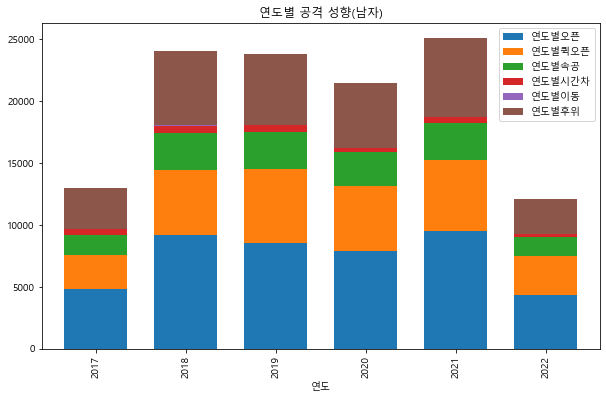

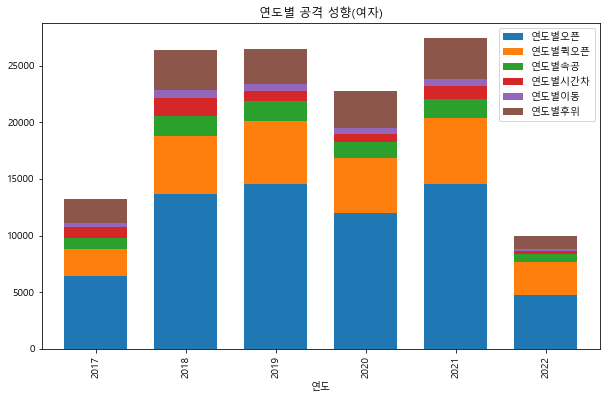

In [21]:
남자_연도별공격기록[['연도별오픈','연도별퀵오픈','연도별속공','연도별시간차','연도별이동','연도별후위']].plot(kind='bar',figsize=(10,6),width=0.7,stacked=True)

plt.title("연도별 공격 성향(남자)")
plt.show()

여자_연도별공격기록[['연도별오픈','연도별퀵오픈','연도별속공','연도별시간차','연도별이동','연도별후위']].plot(kind='bar',figsize=(10,6),width=0.7,stacked=True)

plt.title("연도별 공격 성향(여자)")
plt.show()